In [5]:
import numpy as np
import itertools
import os
import matplotlib.pyplot as plt

# Code to add noise to signals
Will generate an npy file for each parameter combination, of size (noReps, noLevels, noSamps).
No clean data is saved in this file

In [6]:
# calculate the mean signal from a dictionary
base_folder = 'DictionaryUpgradeFISPNoB1/' #'DictionaryFISP_WEX_upgrade/'

# load in all signals from the folder
fileNames = os.listdir(base_folder)
files = [f for f in fileNames if f.endswith('.npy')]
all_fingerprints = []

for file in files:
    file_path = os.path.join(base_folder, file)
    fingerprint = (np.load(file_path, allow_pickle=True))
    # need to compute magnitude
    mag_fingerprint = np.sqrt(fingerprint[:, 0]**2 + fingerprint[:, 1]**2)
    all_fingerprints.append(mag_fingerprint)


print(f"Mean signal value: {np.mean(all_fingerprints)}")
print(f"As a percentage of initial magnetisation: {(np.mean(all_fingerprints)/10000)*100}")


Mean signal value: 2418.0029293992593
As a percentage of initial magnetisation: 24.180029293992593


In [10]:
# for making noisy signals FISP

resArray = range(200,1700,100) #range(200,1700,107) #range(200,1700,70) 
# percentage blood volume (perc) UNIT: %
percArray = range(10,110,10) #REMEMBER IT WILL BE DIVIDED BY 10 110
#T1 of tissue compartment (t1t) UNIT: ms
t1tArray = range(1000,2200,200) #range(700,1700,69) 
#T1 of blood compartment (t1b) UNIT: ms
t1bArray = range(1500,2100,200) #range(1540,1940,27) 
# multiplication factor for the B1 value (multi)
multiArray = range(80, 130, 10) #100

# T2 of tissue compartment UNIT: ms
t2tArray = range(38,127,15)
# T2 of blood compartment UNIT: ms
t2bArray = range(55, 385, 110)
if t2tArray[-1] > 112:
    t2tArray= list(t2tArray)
    t2tArray[-1] = 112

if percArray[-1] > 100:
    percArray= list(percArray)
    percArray[-1] = 100

# half of the original search space
print(f'Residence times: {list(resArray)}')
print(f'Blood Volume Percentage: {list(percArray)}')
print(f'T1t: {list(t1tArray)}')
print(f'Tbt: {list(t1bArray)}')
print(f'B1+: {list(multiArray)}')
print(f'T2t: {list(t2tArray)}')
print(f'T2b: {list(t2bArray)}')

Residence times: [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600]
Blood Volume Percentage: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
T1t: [1000, 1200, 1400, 1600, 1800, 2000]
Tbt: [1500, 1700, 1900]
B1+: [80, 90, 100, 110, 120]
T2t: [38, 53, 68, 83, 98, 112]
T2b: [55, 165, 275]


In [4]:
# for making noisy signals SPGRE
"""
resArray = range(200,1700,200) #range(200,1700,107) #range(200,1700,70) 
# percentage blood volume (perc) UNIT: %
percArray = range(10,120,20) #REMEMBER IT WILL BE DIVIDED BY 10 110
#T1 of tissue compartment (t1t) UNIT: ms
t1tArray = range(1000,2200,400) #range(700,1700,69) 
#T1 of blood compartment (t1b) UNIT: ms
t1bArray = range(1500,2100,400) #range(1540,1940,27) 
# multiplication factor for the B1 value (multi)
multiArray = range(80, 130, 20) #100
# T2 of tissue compartment UNIT: ms
t2tArray = range(38,157,30)
# T2 of blood compartment UNIT: ms
t2bArray = range(55, 385, 220)
"""
resArray = range(200,1700,100) #range(200,1700,107) #range(200,1700,70) 
# percentage blood volume (perc) UNIT: %
percArray = range(10,110,10) #REMEMBER IT WILL BE DIVIDED BY 10 110
#T1 of tissue compartment (t1t) UNIT: ms
t1tArray = range(1000,2200,200) #range(700,1700,69) 
#T1 of blood compartment (t1b) UNIT: ms
t1bArray = range(1500,2100,200) #range(1540,1940,27) 
# multiplication factor for the B1 value (multi)
multiArray = range(80, 130, 10) #100

"""T2 NOT IN SPGRE
# T2 of tissue compartment UNIT: ms
t2tArray = range(38,127,15)
# T2 of blood compartment UNIT: ms
t2bArray = range(55, 385, 110)
if t2tArray[-1] > 112:
    t2tArray= list(t2tArray)
    t2tArray[-1] = 112
"""
if percArray[-1] > 100:
    percArray= list(percArray)
    percArray[-1] = 100

# half of the original search space
print(f'Residence times: {list(resArray)}')
print(f'Blood Volume Percentage: {list(percArray)}')
print(f'T1t: {list(t1tArray)}')
print(f'Tbt: {list(t1bArray)}')
print(f'B1+: {list(multiArray)}')
"""
print(f'T2t: {list(t2tArray)}')
print(f'T2b: {list(t2bArray)}')
"""

Residence times: [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600]
Blood Volume Percentage: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
T1t: [1000, 1200, 1400, 1600, 1800, 2000]
Tbt: [1500, 1700, 1900]
B1+: [80, 90, 100, 110, 120]


"\nprint(f'T2t: {list(t2tArray)}')\nprint(f'T2b: {list(t2bArray)}')\n"

In [17]:
resArray = [200] #range(200,1700,107) #range(200,1700,70) 
# percentage blood volume (perc) UNIT: %
percArray = [10] #REMEMBER IT WILL BE DIVIDED BY 10 110
#T1 of tissue compartment (t1t) UNIT: ms
t1tArray = [1000] #range(700,1700,69) 
#T1 of blood compartment (t1b) UNIT: ms
t1bArray = [1500] #range(1540,1940,27) 
# multiplication factor for the B1 value (multi)
multiArray = [80]
# T2 of tissue compartment UNIT: ms
t2tArray = [38]
# T2 of blood compartment UNIT: ms
t2bArray = [55]

In [11]:
# to iterate through all possible simulation values
params = list(itertools.product(t1tArray, t1bArray, t2tArray, t2bArray, resArray, percArray, multiArray)) #FISP
#params = list(itertools.product(t1tArray, t1bArray, resArray, percArray, multiArray)) #SPGRE
len(params)

243000

In [12]:
# find mean T1 tissue and T1 blood
t1tmean = np.mean(t1tArray)
t1bmean = np.mean(t1bArray)
t2tmean = np.mean(t2tArray)
t2bmean = np.mean(t2bArray)

# remove params from the search space:
# if T1 tissue is above the mean, T2 tissue below the mean should be removed from list of params in itertools
filtered_combinations = [
    (t1t, t1b, t2t, t2b, res, perc, multi) for t1t, t1b, t2t, t2b, res, perc, multi in params
    if not (t1t > t1tmean and t2t < t2tmean) and not(t1b > t1bmean and t2b < t2bmean) and not (t2t > t2tmean and t1t < t1tmean) and not (t2b > t2bmean and t1b < t1bmean) 
]

params = filtered_combinations

In [13]:
print(t1tmean)
print(t2tmean)

print(t1bmean)
print(t2bmean)
filtered_combinations
# Transpose the list to get columns
transposed = list(zip(*filtered_combinations))

# Find the number of unique values in each column
unique_counts = [len(set(column)) for column in transposed]

# Print the results
for i, count in enumerate(unique_counts):
    print(f"Part {i+1} has {count} unique values")

1500.0
75.33333333333333
1700.0
165.0
Part 1 has 6 unique values
Part 2 has 3 unique values
Part 3 has 6 unique values
Part 4 has 3 unique values
Part 5 has 15 unique values
Part 6 has 10 unique values
Part 7 has 5 unique values


In [14]:
noReps = 2000
noSamps = 50
noLevels = 2
noOfIsochromatsX = 1000 #1000
noOfIsochromatsY = 1
noOfIsochromatsZ = 10



In [15]:
print(len(params))

94500


In [16]:

def genNoise(S_ave, SNR, noReps, noSamps=1):
    # generates noise for a given % signal average and SNR levels
    # calculate sigma
    sigma_perc = np.zeros((np.shape(SNR)[0],1))
    sigma_acc = np.zeros((np.shape(SNR)[0],1))
    noiseArray = np.zeros((noReps, len(sigma_perc),noSamps,2)) #size (noReps, noLevels, noSamps, dims)

    count = 0
    for snr in SNR:
        try:
            sigma_perc[count] = S_ave/(100*snr)
            sigma_acc[count] = sigma_perc[count]* (S_ave/100)*10000  # the final term is the mean signal value, not as a percentage
        except:
            sigma_perc[count] = 0
        sigma_app = sigma_acc[count]# 10000 is M0 of all isochromats
        gaussian_noise = np.random.normal(0, sigma_app, ([noReps, noSamps,2]))
        noiseArray[:,count,:,:] = gaussian_noise
        count +=1
    
    return sigma_perc, sigma_acc, noiseArray

In [17]:
sigma_perc, sigma_acc, noiseArray = genNoise(24.180029293992593,[0,11.86], 2000, 50)
# ISMRM value: sigma_perc, sigma_acc, noiseArray = genNoise(23.30182886131701,[11.86], 1000, 50) #11.86 comes from Emma's paper
# FISP: 11.69135454774057 (X signal average only) S_ave, with B1: 23.423438399148136 (magnitude signal average), without B1: 24.180029293992593
# SPGRE S_ave: 13.997695315738538
#np.save('FISPnoiseArraylower.npy',noiseArray)
print(sigma_acc)



[[ 0.        ]
 [49.29796093]]


(2000, 2, 50, 2)
51.119929489752906


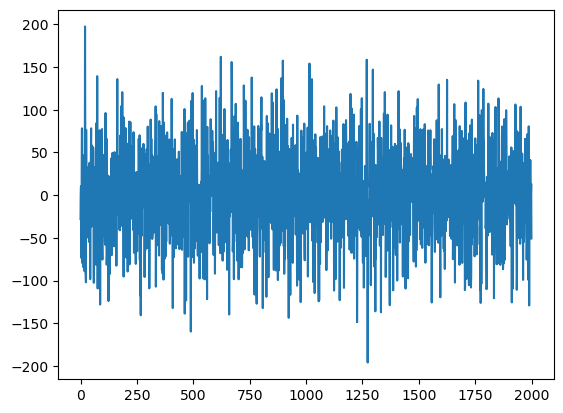

In [18]:
print(noiseArray.shape)
test = noiseArray[:,1,1,1]
plt.plot(test)
print(np.std(test))

In [19]:
for param in params:
    # fetch the dictionary simulated value
    fPath = f'DictionaryUpgradeFISPNoB1/echo_{param[0]}_{param[1]}_{param[2]}_{param[3]}_{param[4]}_{param[5]/10}_{param[6]/100}_1.npy' #FISP
    #fPath = f'DictionarySPGRE_WEX_upgrade/echo_{float(param[0])}_{float(param[1])}_{float(param[2])}_{param[3]/10}_{param[4]/100}_1.npy'
    signal = np.load(fPath)
    # generate noise randomly to apply to the samples for each fingerprint
    noisy_fingerprint_samples = np.zeros((noReps, noLevels, noSamps)) # first dimension is fingerprint, noLevels is noise level and noSamples is the number of samples
    signalExpand = np.tile(np.expand_dims(signal, axis = 2), noLevels)
    # iterate through the number of samples

    for samp in range(noSamps):
        hold = np.copy(signalExpand) # create a 'clean' copy of the signal
        hold[:,0,:] += noiseArray[:,:,samp,0] # add noise to Mx
        hold[:,1,:] += noiseArray[:,:,samp,1] # add noise to My
        noisy_fingerprint_samples[:,:,samp] = np.sqrt((hold[:,0,:])**2 + (hold[:,1,:])**2) # take magnitude
        # scale to have a maximum of 1
        #noisy_fingerprint_samples[:,:,samp] = (noisy_fingerprint_samples[:,:,samp]- np.min(noisy_fingerprint_samples[:,:,samp]))/(np.max(noisy_fingerprint_samples[:,:,samp]))-np.min(noisy_fingerprint_samples[:,:,samp])
        
    # save the noisy signals
    noisyPath = f'../simulationData/noisy_upgradeFISPNoB1/echo_{param[0]}_{param[1]}_{param[2]}_{param[3]}_{param[4]}_{param[5]/10}_{param[6]/100}_{noSamps}.npy' # FISP
    #noisyPath = f'../simulationData/noisy_upgrade_SPGRE/echo_{param[0]}_{param[1]}_{param[2]}_{param[3]/10}_{param[4]/100}_{noSamps}.npy' #SPGRE
    np.save(noisyPath, noisy_fingerprint_samples)

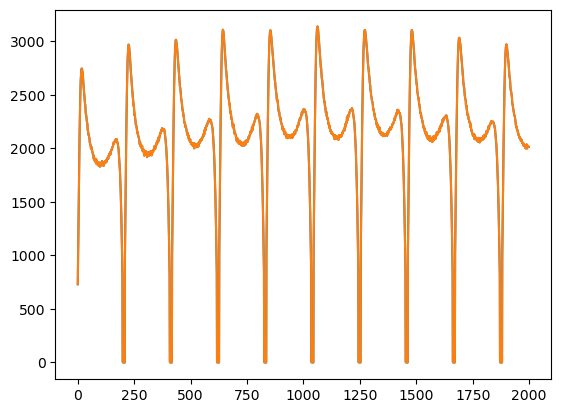

In [25]:
clean =  np.sqrt((signal[:,0])**2 + (signal[:,1])**2) # take magnitude
noisy = np.squeeze(noisy_fingerprint_samples[:,0,4])

plt.plot(noisy[1:])
plt.plot(clean[1:])

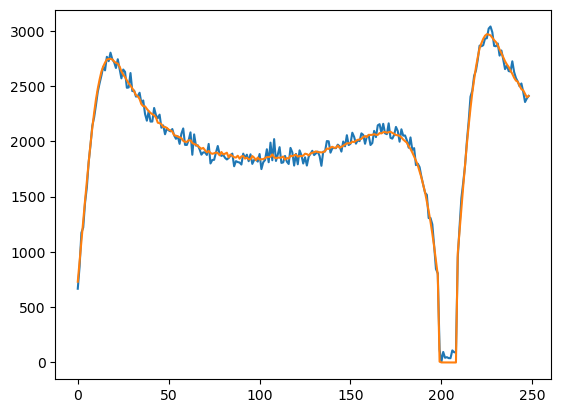

In [26]:
clean =  np.sqrt((signal[:,0])**2 + (signal[:,1])**2) # take magnitude #THIS IS THE FISP PLOT
noisy = np.squeeze(noisy_fingerprint_samples[:,1,4])

plt.plot(noisy[1:250])
plt.plot(clean[1:250])


In [ ]:
a = np.load('DictionaryDiscard/echo_1000_1500_200_1.0_0.8_50.npy')
plt.plot(a[:,2,1])
plt.plot(a[:,0,1])
print(np.std(a[:,0,1]-a[:,2,1]))
np.mean(a[:,0,1])
plt.plot(a[:,2,1]-a[:,0,1])

In [ ]:
print(noisy_fingerprint_samples.shape)
import matplotlib.pyplot as plt
clean = np.sqrt((signal[:,0])**2 + (signal[:,1])**2)
clean = (clean- np.min(clean))/(np.max(clean)-np.min(clean))*1
test = noisy_fingerprint_samples[:,1,10]
#test = (test- np.min(test))/(np.max(test)-np.min(test))*1000
print(np.std(test-clean))
plt.plot(clean[1:200])
plt.plot(test[1:200])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
equilibrium_magnetization = 1
average_signal_percentage = 23.30182886131701 / 100
average_signal = average_signal_percentage * equilibrium_magnetization
sigma_G = 0.01964741  # Desired noise level

# Generate a baseline signal with a constant value equal to the average signal
time_points = 100  # Number of points in the signal
baseline_signal = np.full(time_points, average_signal)

# Add Gaussian noise with zero mean and specified standard deviation
noisy_signal = baseline_signal + np.random.normal(0, sigma_G, time_points)

# Plot the baseline and noisy signals
plt.figure(figsize=(10, 5))
plt.plot(baseline_signal, label="Ideal Signal (23.3% of equilibrium)", color='blue', linewidth=2)
plt.plot(noisy_signal, label=f"Noisy Signal (SNR = 11.86, σ = {sigma_G})", color='red', linestyle='--')
plt.xlabel("Time Points")
plt.ylabel("Signal Amplitude")
plt.legend()
plt.title("Visualization of Signal with Gaussian Noise")
plt.show()


In [ ]:
# Assuming clean_signal and noisy_signal are numpy arrays of the same shape
clean_signal = clean
noisy_signal = test

# Step 1: Calculate the difference (noise)
noise = noisy_signal - clean_signal

# Step 2: Calculate the RMS of the noise
noise_rms = np.sqrt(np.mean(noise**2))

# Step 3: Calculate the RMS of the clean signal
signal_rms = np.sqrt(np.mean(clean_signal**2))

# Step 4: Calculate the percentage of noise
percentage_noise = (noise_rms / signal_rms) * 100

print(f"Percentage of noise added: {percentage_noise}")


In [ ]:
emma_noise = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/coreSimulations/functions/holdArrays/noiseSamples.npy')
plt.plot(emma_noise[:,0,1])
emma_test = np.load('DictionaryDiscard/echo_1000_1500_200_1.0_0.8_50.npy')
print(np.std(emma_noise[:,0,1]))

In [125]:
coarsedictionary =np.genfromtxt('DictionaryFISP_WEX_ISMRM/dictionary.txt', delimiter=',', dtype=None, encoding=None)

In [45]:
def load_dictionary(dictionaryid, acqlen):
    #fPath = os.path.join(os.getcwd(), 'dictionaries', 'Dictionary' + dictionaryid)
    #files = glob.glob(os.path.join(fPath, rr))
    fPath = os.path.join(os.getcwd(), 'Dictionary' + dictionaryid + '/dictionary.txt')
    no_entries = 94500 #len(files)
    raw_dictionary = np.genfromtxt(fPath, delimiter=',', dtype=None, encoding=None).T
    dictionary = np.zeros((acqlen, no_entries))
    #for count, filename in enumerate(files): # normalise the dictionary
    #for i in range(no_entries):
    #   dictionary[:, i] = np.squeeze(raw_dictionary[:, i] / np.linalg.norm(raw_dictionary[:, i]))
        #dictionary[:, count] = np.squeeze(raw_dict[:acqlen] / np.linalg.norm(raw_dict[:acqlen]))
    
    lPath = os.path.join(os.getcwd(), 'Dictionary' + dictionaryid, 'lookupTable.txt')
    lookup=np.loadtxt(lPath,delimiter=',', dtype=None, encoding=None)
    return dictionary,lookup #, files

In [28]:
dictionaryid = 'FISP_WEX_ISMRM'
lPath = os.path.join(os.getcwd(), 'Dictionary' + dictionaryid, 'lookupTable.txt')
lookup=np.loadtxt(lPath,delimiter=',', dtype=None, encoding=None)

In [ ]:
import os
import numpy as np
dictionary, lookup = load_dictionary('FISP_WEX_ISMRM', 1000)

In [ ]:
param = [1000, 1500, 38, 55, 200, 10,80]
noisyPath = f'../simulationData/noisy_ISMRM/echo_{param[0]}_{param[1]}_{param[2]}_{param[3]}_{param[4]}_{param[5]/10}_{param[6]/100}_{noSamps}.npy'

noisyLoad = np.load(noisyPath)
plt.plot(noisyLoad[:,1,0]- noisyLoad[:,0,0])
a=[]
for i in range(50):
    a.append(np.std(noisyLoad[:,1,i]- noisyLoad[:,0,0]))
print((np.mean(a)/10000)*100)

In [ ]:
tester = lookup[1,:]
lPath = os.path.join(os.getcwd(), 'Dictionary' + dictionaryid, f'echo_1000_1500_38_55_200_1.0_0.9_1.npy')
testersig = np.load(lPath)
testersig = np.sqrt((testersig[:,0])**2 + (testersig[:,1])**2)
testersig = np.squeeze(testersig/ np.linalg.norm(testersig))
plt.plot(testersig)

plt.plot(dictionary[:,1])

In [ ]:
plt.plot(testersig -  dictionary[:,6])

In [ ]:
np.mean((coarsedictionary/1000)*100)

## Mean % signal of coarser dictionary = 23.30182886131701

In [ ]:
coarsedictionary.shape

In [ ]:
plt.plot(coarsedictionary[0,:])
np.mean(coarsedictionary[0,:])

In [ ]:
plt.plot(coarsedictionary[0,:] / np.linalg.norm(coarsedictionary[0,:]))
np.mean(coarsedictionary[0,:] / np.linalg.norm(coarsedictionary[0,:]))

In [ ]:
noisy_simu = np.load('DictionaryDiscard/echo_1000_1500_38_55_200_1.0_0.8_3.npy')
plt.plot(noisy_simu[:400,3])
print(np.std(noisy_simu[:,1]-noisy_simu[:,0]))